# Optimization Techniques on MNIST Dataset
This notebook explores various optimization techniques for training neural networks on the MNIST dataset. The focus will be on different optimization strategies including Adaptive Learning Rates, SGD, Mini-Batch Gradient Descent, and Learning Rate Adjustments. Each section will provide a practical task related to these techniques.

In [53]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)
# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [54]:
x_train.shape , x_test.shape

((60000, 784), (10000, 784))

## Adaptive Learning Rates

## Implementing a Simple Neural Network from Scratch

### Building the Network
Define the architecture of a simple feedforward neural network with one hidden layer. You will need to manually initialize the weights and biases.

**TODO:** Initialize Parameters
Objective: Create a function to initialize weights and biases for all layers of the network.
Instructions:
- Initialize weights with small random values and biases with zeros.
- Use numpy for creating arrays and operations.

Hint: Use np.random.randn for weights and np.zeros for biases. Scale weights by 0.1.

In [2]:
def initialize_parameters(input_size, hidden_size, output_size):
    """
    Initialize weights and biases for a simple feedforward neural network.

    Parameters:
    - input_size: Number of input features.
    - hidden_size: Number of neurons in the hidden layer.
    - output_size: Number of output classes.

    Returns:
    - parameters: A dictionary containing weights and biases.
    """

    np.random.seed(42)
    parameters = {
        'W1':np.random.randn(hidden_size, input_size) * 0.1,
        'b1':np.zeros((hidden_size, 1)),
        'W2':np.random.randn(output_size, hidden_size) * 0.1,
        'b2':np.zeros((output_size, 1))

    }

    return parameters




TODO: Define Activation Functions
Objective: Implement commonly used activation functions.
Instructions:
 - Define the ReLU and Sigmoid activation functions.
 - Ensure each function works with numpy arrays and supports both forward and derivative (gradient) computations.


In [3]:
import numpy as np

def relu(x):
    """
    ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying ReLU.
    """
    return np.maximum(0, x)

def relu_derivative(x):
    """
    Derivative of ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of ReLU.
    """
    return np.where(x > 0, 1, 0)

def sigmoid(x):
    """
    Sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying sigmoid.
    """
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """
    Derivative of sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of sigmoid.
    """
    sig = sigmoid(x)
    return sig * (1 - sig)


TODO: Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.

In [4]:
def forward_propagation(X, parameters):
    """
    Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation, shape: number of examples x output size).
    - cache: Dictionary containing intermediate values for backpropagation.
    """
    # Retrieve weights and biases from parameters
    W1 = parameters["W1"]  # Shape: (hidden_size, input_size)
    b1 = parameters["b1"]  # Shape: (hidden_size, 1)
    W2 = parameters["W2"]  # Shape: (output_size, hidden_size)
    b2 = parameters["b2"]  # Shape: (output_size, 1)

    # Forward propagation: Input to hidden layer
    Z1 = np.dot(X, W1.T) + b1.T  # Shape: (m, hidden_size)
    A1 = relu(Z1)                # Shape: (m, hidden_size)

    # Forward propagation: Hidden to output layer
    Z2 = np.dot(A1, W2.T) + b2.T  # Shape: (m, output_size)
    A2 = sigmoid(Z2)              # Shape: (m, output_size)

    # Cache intermediate values for backpropagation
    cache = {
        "X": X,     # Shape: (m, input_size)
        "Z1": Z1,   # Shape: (m, hidden_size)
        "A1": A1,   # Shape: (m, hidden_size)
        "Z2": Z2,   # Shape: (m, output_size)
        "A2": A2    # Shape: (m, output_size)
    }

    return A2, cache


TODO: Implement the loss function. Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.

In [5]:
def compute_loss(y_true, y_pred):
    """
    Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded, shape: number of examples x output size).
    - y_pred: Predicted probabilities (shape: number of examples x output size).

    Returns:
    - loss: Computed loss (scalar).
    """
    # Number of examples
    m = y_true.shape[0]

    # Avoid division by zero by adding a small epsilon
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    # Compute the categorical cross-entropy loss
    loss = -np.sum(y_true * np.log(y_pred)) / m

    return loss


TODO: Implement backpropagation for the network and Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.

In [6]:
def backward_propagation(X, y_true, parameters, cache):
    """
    Perform backward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - y_true: True labels (one-hot encoded, shape: number of examples x output size).
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.
    """
    # Retrieve cache values
    A1 = cache["A1"]    # Shape: (m, hidden_size)
    A2 = cache["A2"]    # Shape: (m, output_size)
    Z1 = cache["Z1"]    # Shape: (m, hidden_size)
    X = cache["X"]      # Shape: (m, input_size)

    # Retrieve parameters
    W2 = parameters["W2"]  # Shape: (output_size, hidden_size)

    # Number of examples
    m = X.shape[0]

    # Compute gradients for output layer
    dZ2 = A2 - y_true                   # Shape: (m, output_size)
    dW2 = (1 / m) * np.dot(dZ2.T, A1)   # Shape: (output_size, hidden_size)
    db2 = (1 / m) * np.sum(dZ2.T, axis=1, keepdims=True)  # Shape: (output_size, 1)

    # Compute gradients for hidden layer
    dA1 = np.dot(dZ2, W2)               # Shape: (m, hidden_size)
    dZ1 = dA1 * relu_derivative(Z1)     # Shape: (m, hidden_size)
    dW1 = (1 / m) * np.dot(dZ1.T, X)    # Shape: (hidden_size, input_size)
    db1 = (1 / m) * np.sum(dZ1.T, axis=1, keepdims=True)  # Shape: (hidden_size, 1)

    # Store gradients in a dictionary
    gradients = {
        "dW1": dW1,  # Shape: (hidden_size, input_size)
        "db1": db1,  # Shape: (hidden_size, 1)
        "dW2": dW2,  # Shape: (output_size, hidden_size)
        "db2": db2   # Shape: (output_size, 1)
    }

    return gradients


TODO: Update the parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.

In [7]:
def update_parameters(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    # Update weights and biases for hidden layer
    parameters["W1"] -= learning_rate * gradients["dW1"]
    parameters["b1"] -= learning_rate * gradients["db1"]

    # Update weights and biases for output layer
    parameters["W2"] -= learning_rate * gradients["dW2"]
    parameters["b2"] -= learning_rate * gradients["db2"]

    return parameters


TODO: Train the model by changing the hidden layer size (such as [32, 64, 128]) and observe the impact on network performance during training.

    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

In [58]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model.

    Parameters:
    - X_train: Training data (shape: number of examples x input size).
    - y_train: One-hot encoded labels (shape: number of examples x output size).
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """
    input_size = X_train.shape[1]  # Number of features
    output_size = y_train.shape[1]  # Number of output classes

    # Initialize parameters
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    print(f"Training with hidden layer size: {hidden_size}")

    # Training loop
    for epoch in range(epochs):
        # Forward propagation
        A2, cache = forward_propagation(X_train, parameters)

        # Compute loss
        loss = compute_loss(y_train, A2)

        # Backward propagation
        gradients = backward_propagation(X_train, y_train, parameters, cache)

        # Update parameters
        parameters = update_parameters(parameters, gradients, learning_rate)

        # Print loss at regular intervals
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return parameters


In [59]:
# Train with different hidden layer sizes
for hidden_size in [32, 64, 128]:
    parameters = train_model(x_train, y_train, hidden_size, epochs=50, learning_rate=0.01)

Training with hidden layer size: 32
Epoch 0, Loss: 0.7471
Epoch 10, Loss: 1.2702
Epoch 20, Loss: 1.7598
Epoch 30, Loss: 1.9394
Epoch 40, Loss: 1.9717
Training with hidden layer size: 64
Epoch 0, Loss: 0.7768
Epoch 10, Loss: 1.6539
Epoch 20, Loss: 1.8927
Epoch 30, Loss: 1.9067
Epoch 40, Loss: 1.8600
Training with hidden layer size: 128
Epoch 0, Loss: 0.7071
Epoch 10, Loss: 1.7916
Epoch 20, Loss: 1.8225
Epoch 30, Loss: 1.7262
Epoch 40, Loss: 1.6230


TODO: Implement Adam Optimizer

1. Initialize Parameters: Create variables to store the moment estimates (first and second) for each parameter.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).

2. Update Rules: Implement the update rules based on the gradients, learning rate, and moment estimates.


In [20]:

def initialize_adam(parameters):
    """
    Initialize the Adam optimizer variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).
    """
    v = {}
    s = {}
    t = 0  # Initialize time step

    # Initialize v and s for each parameter
    for key in parameters.keys():
        v[key] = np.zeros_like(parameters[key])
        s[key] = np.zeros_like(parameters[key])

    return v, s, t

def update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Update parameters using the Adam optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: First moment vector.
    - s: Second moment vector.
    - t: Time step.
    - learning_rate: Learning rate for updates.
    - beta1: Exponential decay rate for the first moment estimates.
    - beta2: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated first moment vector.
    - s: Updated second moment vector.
    - t: Updated time step.
    """
    t += 1  # Increment time step

    v_corrected = {}
    s_corrected = {}

    # Update parameters
    for key in parameters.keys():
        # Compute moving averages of the gradients
        v[key] = beta1 * v[key] + (1 - beta1) * gradients['d' + key]
        s[key] = beta2 * s[key] + (1 - beta2) * (gradients['d' + key] ** 2)

        # Compute bias-corrected first moment estimate
        v_corrected[key] = v[key] / (1 - beta1 ** t)

        # Compute bias-corrected second moment estimate
        s_corrected[key] = s[key] / (1 - beta2 ** t)

        # Update parameters
        parameters[key] -= learning_rate * v_corrected[key] / (np.sqrt(s_corrected[key]) + epsilon)

    return parameters, v, s, t


TODO: Implement Adam optimizer into the training loop.

In [21]:
# Training function using Adam optimizer
def train_model_with_adam(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001):
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    # Initialize parameters
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    # Initialize Adam optimizer variables
    v, s, t = initialize_adam(parameters)

    print(f"Training with hidden layer size: {hidden_size}")

    # Training loop
    for epoch in range(epochs):
        # Forward propagation
        A2, cache = forward_propagation(X_train, parameters)

        # Compute loss
        loss = compute_loss(y_train, A2)

        # Backward propagation
        gradients = backward_propagation(X_train, y_train, parameters, cache)

        # Update parameters using Adam optimizer
        parameters, v, s, t = update_parameters_with_adam(
            parameters, gradients, v, s, t, learning_rate=learning_rate
        )

        # Print loss at regular intervals
        if epoch % 10 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return parameters

In [57]:

for hidden_size in [32, 64, 128]:
    parameters = train_model_with_adam(x_train, y_train, hidden_size, epochs=50, learning_rate=0.001)


Training with hidden layer size: 32
Epoch 0, Loss: 0.7471
Epoch 10, Loss: 1.3035
Epoch 20, Loss: 2.0559
Epoch 30, Loss: 1.8968
Epoch 40, Loss: 1.4999
Epoch 49, Loss: 1.3879
Training with hidden layer size: 64
Epoch 0, Loss: 0.7768
Epoch 10, Loss: 1.7646
Epoch 20, Loss: 1.8278
Epoch 30, Loss: 1.2071
Epoch 40, Loss: 1.0144
Epoch 49, Loss: 0.9257
Training with hidden layer size: 128
Epoch 0, Loss: 0.7071
Epoch 10, Loss: 2.1227
Epoch 20, Loss: 1.1574
Epoch 30, Loss: 0.9296
Epoch 40, Loss: 0.8694
Epoch 49, Loss: 0.7939


### Compare Adam and RMSprop


TODO: First, implement the RMSprop optimizer. The RMSprop optimizer uses a moving average of squared gradients to normalize the gradient, which helps to stabilize the updates.

In [33]:
def initialize_rmsprop(parameters):
    """
    Initialize the RMSprop variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - s: Second moment vector (initialized to zeros).
    """
    s = {}
    for key in parameters.keys():
        s[key] = np.zeros_like(parameters[key])
    return s

def update_parameters_with_rmsprop(parameters, gradients, s, learning_rate=0.001, beta=0.9, epsilon=1e-8):
    """
    Update parameters using the RMSprop optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - s: Second moment vector.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - s: Updated second moment vector.
    """
    for key in parameters.keys():
        # Update the second moment estimate
        s[key] = beta * s[key] + (1 - beta) * (gradients['d' + key] ** 2)

        # Update parameters
        parameters[key] -= learning_rate * gradients['d' + key] / (np.sqrt(s[key]) + epsilon)

    return parameters, s


TODO: Modify the training loop to allow for both optimizers and store the loss history for comparison.

In [40]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001, optimizer='adam'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data (shape: number of examples x input size).
    - y_train: One-hot encoded labels (shape: number of examples x output size).
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('adam' or 'rmsprop').

    Returns:
    - loss_history: List of loss values over epochs.
    """
    input_size = X_train.shape[1]   # Number of input features
    output_size = y_train.shape[1]  # Number of output classes

    # Initialize parameters
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    # Initialize optimizer variables
    if optimizer.lower() == 'adam':
        v, s, t = initialize_adam(parameters)
    elif optimizer.lower() == 'rmsprop':
        s = initialize_rmsprop(parameters)
    else:
        raise ValueError("Optimizer must be 'adam' or 'rmsprop'.")

    loss_history = []

    print(f"Training with hidden layer size: {hidden_size} using {optimizer.upper()} optimizer")

    # Training loop
    for epoch in range(epochs):
        # Forward propagation
        A2, cache = forward_propagation(X_train, parameters)

        # Compute loss
        loss = compute_loss(y_train, A2)
        loss_history.append(loss)

        # Backward propagation
        gradients = backward_propagation(X_train, y_train, parameters, cache)

        # Update parameters using the specified optimizer
        if optimizer.lower() == 'adam':
            parameters, v, s, t = update_parameters_with_adam(
                parameters, gradients, v, s, t, learning_rate=learning_rate
            )
        elif optimizer.lower() == 'rmsprop':
            parameters, s = update_parameters_with_rmsprop(
                parameters, gradients, s, learning_rate=learning_rate
            )

        # Print loss at regular intervals
        if epoch % 10 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return loss_history


TODO:  Compare Both Optimizers. Create a function to train the model using both optimizers and plot the loss histories for comparison.

In [47]:
def compare_optimizers(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the Adam and RMSprop optimizers.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """
    import matplotlib.pyplot as plt

    # Train with Adam optimizer
    print("Training with Adam optimizer...")
    loss_history_adam = train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001, optimizer='adam')

    # Train with RMSprop optimizer
    print("\nTraining with RMSprop optimizer...")
    loss_history_rmsprop = train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001, optimizer='rmsprop')

    # Plot loss per epochs for both optimizers in one figure
    plt.figure(figsize = (12,8))
    plt.plot(loss_history_adam, label='Adam')
    plt.plot(loss_history_rmsprop, label='RMSprop')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss per Epoch for Adam and RMSprop')
    plt.grid(True)
    plt.legend()
    plt.show()


Training with Adam optimizer...
Training with hidden layer size: 128 using ADAM optimizer
Epoch 0, Loss: 0.7071
Epoch 10, Loss: 2.1227
Epoch 20, Loss: 1.1574
Epoch 30, Loss: 0.9296
Epoch 40, Loss: 0.8694
Epoch 49, Loss: 0.7939

Training with RMSprop optimizer...
Training with hidden layer size: 128 using RMSPROP optimizer
Epoch 0, Loss: 0.7071
Epoch 10, Loss: 1.1144
Epoch 20, Loss: 0.9192
Epoch 30, Loss: 0.9017
Epoch 40, Loss: 0.8435
Epoch 49, Loss: 0.7464


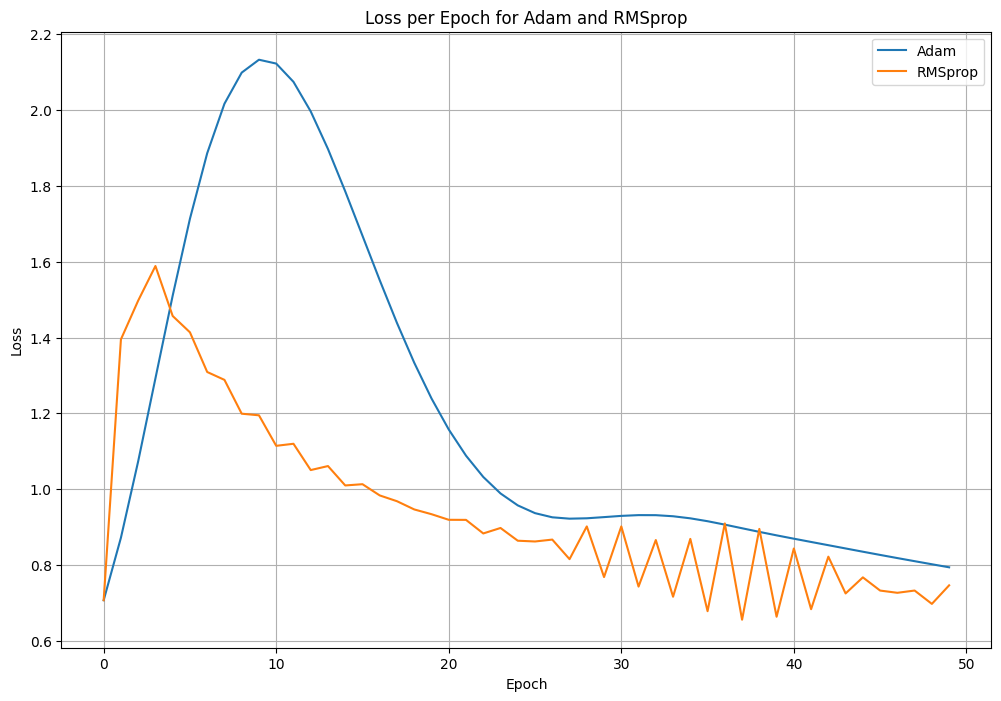

In [56]:
compare_optimizers(x_train, y_train, hidden_size, epochs=50)

## Stochastic Gradient Descent (SGD)

### Impact of Different Learning Rates on SGD


Explore the impact of different learning rates on the training dynamics and performance of Stochastic Gradient Descent (SGD). This will allow us to observe how the learning rate affects convergence speed, stability, and final performance.

Steps for Implementing the Experiment

1. Define the SGD Optimizer: Implement a simple SGD optimizer.
2. Modify the Training Loop: Allow for different learning rates.
3. Train the Model: Run the training process with a set of predefined learning rates.
4. Visualize the Results: Plot the loss curves for each learning rate to compare their effects

1. Implement SGD Optimizer


In [60]:
def update_parameters_with_sgd(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using Stochastic Gradient Descent (SGD).

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    for key in parameters.keys():
        parameters[key] -= learning_rate * gradients['d' + key]
    return parameters


2. Modify the Training Loop


In [61]:
def train_model_with_sgd(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using SGD optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    # Initialize parameters
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    loss_history = []

    print(f"Training with learning rate: {learning_rate}")

    # Training loop
    for epoch in range(epochs):
        # Forward propagation
        A2, cache = forward_propagation(X_train, parameters)

        # Compute loss
        loss = compute_loss(y_train, A2)
        loss_history.append(loss)

        # Backward propagation
        gradients = backward_propagation(X_train, y_train, parameters, cache)

        # Update parameters using SGD optimizer
        parameters = update_parameters_with_sgd(parameters, gradients, learning_rate=learning_rate)

        # Print loss at regular intervals
        if epoch % 10 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return loss_history


3. Experiment with Different Learning Rates


In [62]:
def compare_learning_rates(X_train, y_train, hidden_size, epochs=50, learning_rates=[0.001, 0.01, 0.1]):
    """
    Compare the performance of SGD with different learning rates.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rates: List of learning rates to test.
    """
    import matplotlib.pyplot as plt

    loss_histories = {}

    for lr in learning_rates:
        loss_history = train_model_with_sgd(X_train, y_train, hidden_size, epochs=50, learning_rate=lr)
        loss_histories[lr] = loss_history

    # Plot loss per epoch for each learning rate
    plt.figure(figsize = (12,8))
    for lr in learning_rates:
        plt.plot(loss_histories[lr], label=f'Learning rate {lr}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Comparison for Different Learning Rates(SGD)')
    plt.grid(True)
    plt.legend()
    plt.show()


Training with learning rate: 0.001
Epoch 0, Loss: 0.7071
Epoch 10, Loss: 0.9149
Epoch 20, Loss: 1.1009
Epoch 30, Loss: 1.2559
Epoch 40, Loss: 1.3819
Epoch 49, Loss: 1.4740
Training with learning rate: 0.01
Epoch 0, Loss: 0.7071
Epoch 10, Loss: 1.7916
Epoch 20, Loss: 1.8225
Epoch 30, Loss: 1.7262
Epoch 40, Loss: 1.6230
Epoch 49, Loss: 1.5397
Training with learning rate: 0.1
Epoch 0, Loss: 0.7071
Epoch 10, Loss: 1.3256
Epoch 20, Loss: 1.0530
Epoch 30, Loss: 0.9375
Epoch 40, Loss: 0.8705
Epoch 49, Loss: 0.8259


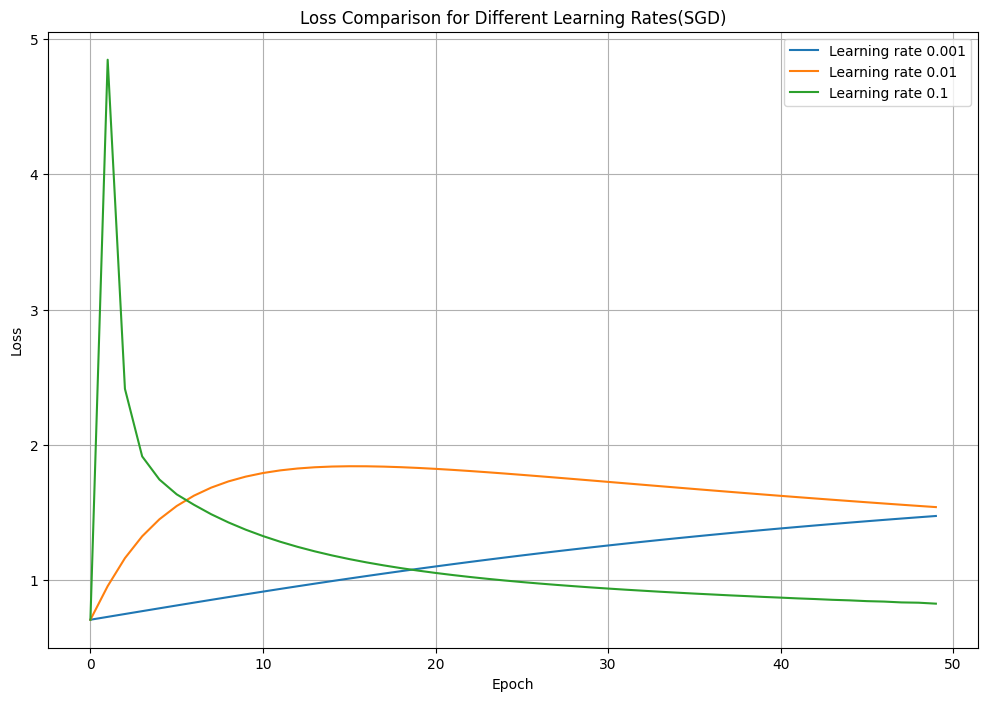

In [63]:
compare_learning_rates(x_train, y_train, hidden_size, epochs=50, learning_rates=[0.001, 0.01, 0.1])

### SGD with Momentum vs. Classic SGD


TODO: Compare Stochastic Gradient Descent (SGD) with momentum and classic SGD, you can set up an experiment that trains the same model using both methods. This will help you observe differences in convergence speed and stability.

Steps for Implementing the Comparison:

1. Implement Classic SGD: Ensure you have a basic SGD implementation.(already implemented in the previous cells)

2. Implement SGD with Momentum: Add a momentum version of the SGD optimizer.

3. Modify the Training Loop: Allow for both optimizers in the training process.

4. Train the Model: Run the training process using both optimizers.

5. Visualize the Results: Plot the loss curves for each optimizer to compare their performance.

2. Implement SGD with Momentum


In [64]:
def initialize_momentum(parameters):
    """
    Initialize the momentum variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: Momentum variable (initialized to zeros).
    """
    v = {}
    for key in parameters.keys():
        v[key] = np.zeros_like(parameters[key])
    return v

def update_parameters_with_momentum(parameters, gradients, v, learning_rate=0.01, beta=0.9):
    """
    Update parameters using SGD with momentum.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: Momentum variable.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for momentum.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated momentum variable.
    """
    for key in parameters.keys():
        # Update velocity
        v[key] = beta * v[key] + gradients['d' + key]
        # Update parameters
        parameters[key] -= learning_rate * v[key]
    return parameters, v


3. Modify the Training Loop


In [67]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, optimizer='sgd'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('sgd' or 'momentum').

    Returns:
    - loss_history: List of loss values over epochs.
    """
    input_size = X_train.shape[1]   # Number of input features
    output_size = y_train.shape[1]  # Number of output classes

    # Initialize parameters
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    # Initialize optimizer variables
    if optimizer.lower() == 'momentum':
        v = initialize_momentum(parameters)
    elif optimizer.lower() == 'sgd':
        pass  # No additional initialization required for SGD
    else:
        raise ValueError("Optimizer must be 'sgd' or 'momentum'.")

    loss_history = []

    print(f"Training with hidden layer size: {hidden_size} using {optimizer.upper()} optimizer")

    # Training loop
    for epoch in range(epochs):
        # Forward propagation
        A2, cache = forward_propagation(X_train, parameters)

        # Compute loss
        loss = compute_loss(y_train, A2)
        loss_history.append(loss)

        # Backward propagation
        gradients = backward_propagation(X_train, y_train, parameters, cache)

        # Update parameters using the specified optimizer
        if optimizer.lower() == 'momentum':
            parameters, v = update_parameters_with_momentum(
                parameters, gradients, v, learning_rate=learning_rate
            )
        elif optimizer.lower() == 'sgd':
            parameters = update_parameters_with_sgd(
                parameters, gradients, learning_rate=learning_rate
            )

        # Print loss at regular intervals
        if epoch % 10 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return loss_history


4. Train the Model with Both Optimizers


In [70]:
def compare_sgd_and_momentum(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the performance of classic SGD and SGD with momentum.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """
    import matplotlib.pyplot as plt

    # Training with Classic SGD
    print("Training with Classic SGD...")
    loss_history_sgd = train_model(
        X_train, y_train, hidden_size, epochs=epochs, learning_rate=0.01, optimizer='sgd'
    )

    print("\nTraining with SGD with Momentum...")
    # Training with SGD with Momentum
    loss_history_momentum = train_model(
        X_train, y_train, hidden_size, epochs=epochs, learning_rate=0.01, optimizer='momentum'
    )

    # Plot the loss of SGD and Momentum per epoch
    plt.figure(figsize=(12, 8))
    plt.plot(loss_history_sgd, label='SGD')
    plt.plot(loss_history_momentum, label='Momentum')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss per Epoch for SGD and Momentum')
    plt.grid(True)
    plt.legend()
    plt.show()


Training with Classic SGD...
Training with hidden layer size: 128 using SGD optimizer
Epoch 0, Loss: 0.7071
Epoch 10, Loss: 1.7916
Epoch 20, Loss: 1.8225
Epoch 30, Loss: 1.7262
Epoch 40, Loss: 1.6230
Epoch 49, Loss: 1.5397

Training with SGD with Momentum...
Training with hidden layer size: 128 using MOMENTUM optimizer
Epoch 0, Loss: 0.7071
Epoch 10, Loss: 2.7559
Epoch 20, Loss: 1.1530
Epoch 30, Loss: 1.0727
Epoch 40, Loss: 1.0228
Epoch 49, Loss: 0.8291


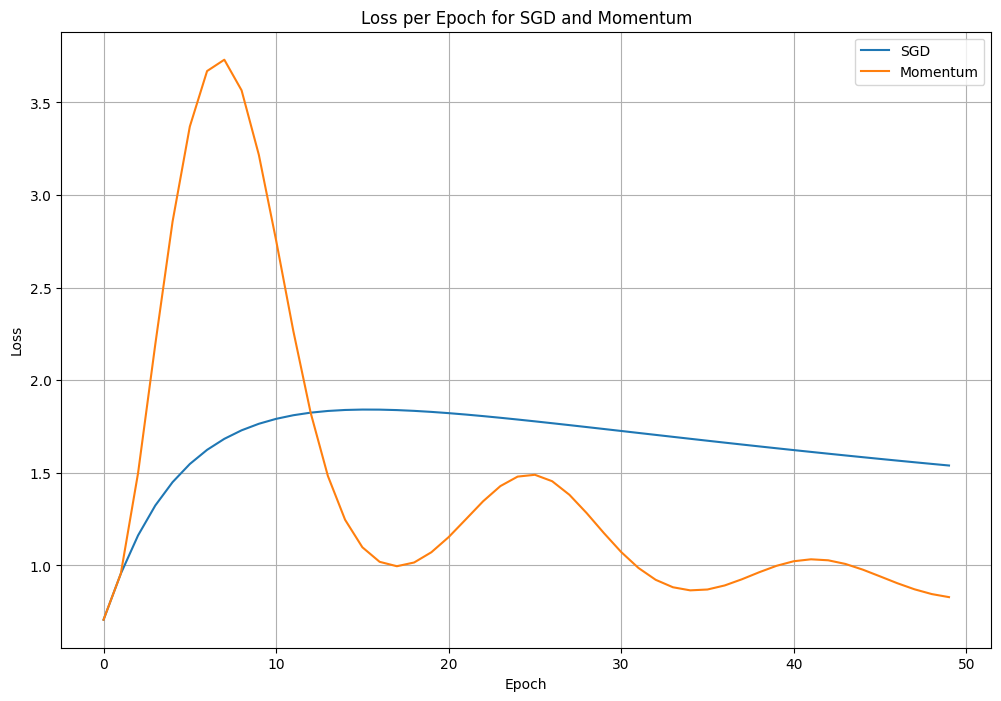

In [71]:
compare_sgd_and_momentum(x_train, y_train, 128, epochs=50)

## Mini-Batch Gradient Descent

### Mini-Batch Size Optimization

TODO: Investigate how different mini-batch sizes affect model performance, you can set up an experiment where you train the same model using various mini-batch sizes.

Steps for Implementing the Mini-Batch Size Experiment

1. Modify the Training Loop: Update the training loop to use mini-batches.
2. Train the Model: Run the training process with a set of predefined mini-batch sizes.
3. Evaluate Performance: Track training time and accuracy for each mini-batch size.
4. Print the training losses and accuracies for comparison.

1. Modify the Training Loop for Mini-Batches


In [72]:
def compute_accuracy(y_true, y_pred):
    """
    Compute the accuracy between true labels and predictions.

    Parameters:
    - y_true: True labels (one-hot encoded), shape: (number of examples, number of classes)
    - y_pred: Predicted probabilities, shape: (number of examples, number of classes)

    Returns:
    - accuracy: Accuracy as a percentage.
    """
    y_true_labels = np.argmax(y_true, axis=1)
    y_pred_labels = np.argmax(y_pred, axis=1)
    accuracy = np.mean(y_true_labels == y_pred_labels) * 100
    return accuracy

def train_model_with_mini_batches(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, batch_size=32):
    """
    Train the neural network model using mini-batches.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - batch_size: Size of mini-batches.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    # Initialize parameters
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    loss_history = []
    accuracy_history = []

    m = X_train.shape[0]

    print(f"Training with mini-batch size: {batch_size}")

    for epoch in range(epochs):
        # Shuffle the data
        permutation = np.random.permutation(m)
        X_shuffled = X_train[permutation]
        y_shuffled = y_train[permutation]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            # Forward propagation
            A2, cache = forward_propagation(X_batch, parameters)

            # Backward propagation
            gradients = backward_propagation(X_batch, y_batch, parameters, cache)

            # Update parameters using SGD optimizer
            parameters = update_parameters_with_sgd(parameters, gradients, learning_rate=learning_rate)

        # After processing all mini-batches, compute loss and accuracy on the training set
        A2_full, _ = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, A2_full)
        accuracy = compute_accuracy(y_train, A2_full)

        loss_history.append(loss)
        accuracy_history.append(accuracy)

        # Print loss and accuracy at regular intervals
        if epoch % 10 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy:.2f}%")

    return loss_history, accuracy_history


2. Train the Model with Different Mini-Batch Sizes


In [75]:
def compare_mini_batch_sizes(X_train, y_train, hidden_size, epochs=50, batch_sizes=[16, 32, 64]):
    """
    Compare the performance of different mini-batch sizes and print results.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_sizes: List of mini-batch sizes to test.
    """
    import matplotlib.pyplot as plt
    import time

    loss_histories = {}
    accuracy_histories = {}
    training_times = {}

    for batch_size in batch_sizes:
        start_time = time.time()
        loss_history, accuracy_history = train_model_with_mini_batches(
            X_train, y_train, hidden_size, epochs=epochs, learning_rate=0.01, batch_size=batch_size
        )
        end_time = time.time()
        training_time = end_time - start_time
        training_times[batch_size] = training_time
        loss_histories[batch_size] = loss_history
        accuracy_histories[batch_size] = accuracy_history


    # Plot the loss for each mini-batch size
    plt.figure(figsize=(12, 8))

    plt.subplot(1, 2, 1)
    for batch_size in batch_sizes:
        plt.plot(loss_histories[batch_size], label=f'Batch size {batch_size}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss per Epoch for Different Mini-Batch Sizes')
    plt.grid(True)
    plt.legend()


    # Plot the accuracy for each mini-batch size
    plt.subplot(1, 2, 2)
    for batch_size in batch_sizes:
        plt.plot(accuracy_histories[batch_size], label=f'Batch size {batch_size}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy per Epoch for Different Mini-Batch Sizes')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Print training times
    print("\nTraining times for different batch sizes:")
    for batch_size in batch_sizes:
        print(f"Batch size {batch_size}: {training_times[batch_size]:.2f} seconds")


Training with mini-batch size: 16
Epoch 0, Loss: 0.5409, Accuracy: 82.61%
Epoch 10, Loss: 0.3379, Accuracy: 88.92%
Epoch 20, Loss: 0.2948, Accuracy: 90.05%
Epoch 30, Loss: 0.2546, Accuracy: 91.77%
Epoch 40, Loss: 0.2258, Accuracy: 92.24%
Epoch 49, Loss: 0.2053, Accuracy: 93.12%
Training with mini-batch size: 32
Epoch 0, Loss: 0.6008, Accuracy: 80.64%
Epoch 10, Loss: 0.3920, Accuracy: 87.34%
Epoch 20, Loss: 0.3472, Accuracy: 88.52%
Epoch 30, Loss: 0.3021, Accuracy: 89.98%
Epoch 40, Loss: 0.2788, Accuracy: 90.47%
Epoch 49, Loss: 0.2618, Accuracy: 91.30%
Training with mini-batch size: 64
Epoch 0, Loss: 0.6897, Accuracy: 77.40%
Epoch 10, Loss: 0.4483, Accuracy: 85.50%
Epoch 20, Loss: 0.4111, Accuracy: 86.67%
Epoch 30, Loss: 0.3648, Accuracy: 88.16%
Epoch 40, Loss: 0.3314, Accuracy: 88.89%
Epoch 49, Loss: 0.3165, Accuracy: 89.40%


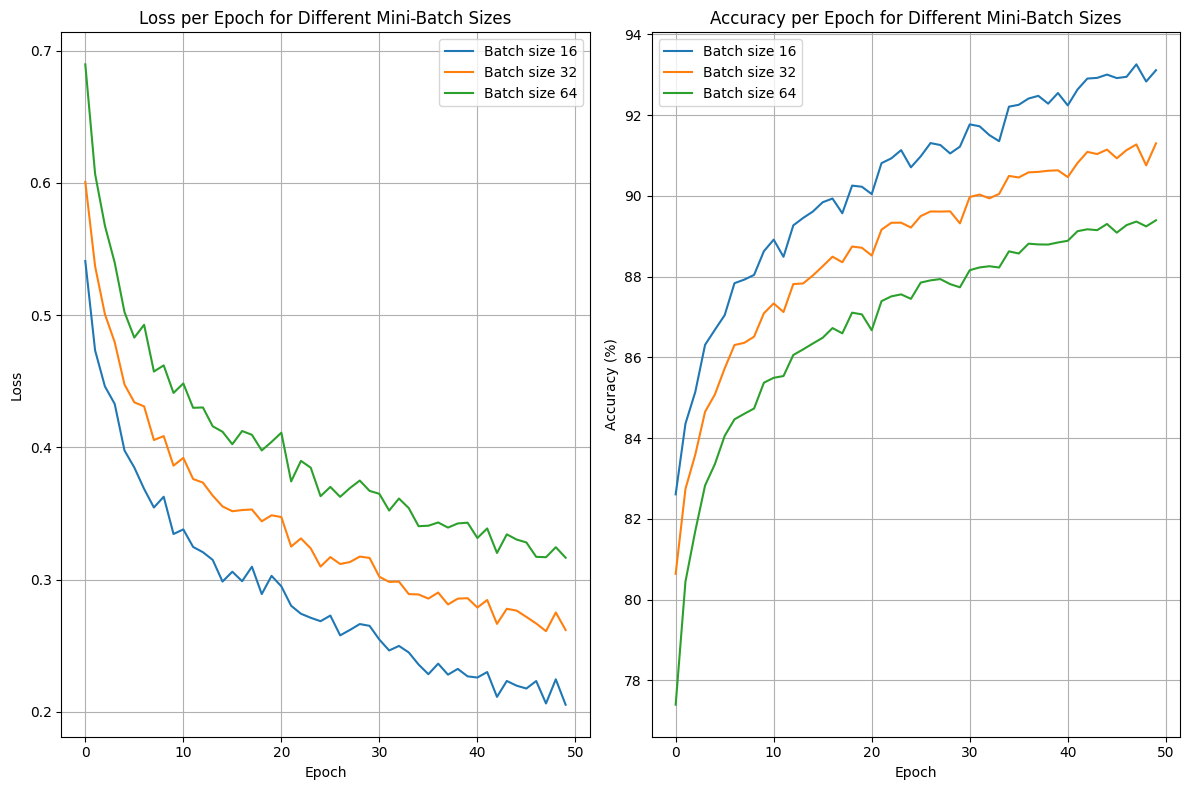


Training times for different batch sizes:
Batch size 16: 250.76 seconds
Batch size 32: 174.00 seconds
Batch size 64: 138.93 seconds


In [76]:
compare_mini_batch_sizes(x_train, y_train, hidden_size, epochs=50, batch_sizes=[16, 32, 64])

### Mini-Batch vs. Full-Batch Gradient Descent


TODO: Compare the efficiency and performance of mini-batch gradient descent against full-batch gradient descent.

1. Implement Full-Batch Gradient Descent: Ensure you have a full-batch gradient descent implementation.

2. Modify the Training Loop: Allow the training loop to handle both mini-batch and full-batch scenarios.

3. Train the Model: Run the training process using both methods and track their performance.

4. Print Results: Display the final loss and accuracy for both methods along with training times.

In [77]:
def train_model_full_batch(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    input_size = X_train.shape[1]   # Number of input features
    output_size = y_train.shape[1]  # Number of output classes

    # Initialize parameters
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    loss_history = []
    accuracy_history = []

    print("Training with full-batch gradient descent")

    for epoch in range(epochs):
        # Forward propagation
        A2, cache = forward_propagation(X_train, parameters)

        # Compute loss
        loss = compute_loss(y_train, A2)
        loss_history.append(loss)

        # Compute accuracy
        accuracy = compute_accuracy(y_train, A2)
        accuracy_history.append(accuracy)

        # Backward propagation
        gradients = backward_propagation(X_train, y_train, parameters, cache)

        # Update parameters using SGD optimizer
        parameters = update_parameters_with_sgd(parameters, gradients, learning_rate=learning_rate)

        # Print loss and accuracy at regular intervals
        if epoch % 10 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy:.2f}%")

    return loss_history, accuracy_history


In [78]:
def compare_mini_batch_and_full_batch(X_train, y_train, hidden_size, epochs=50, batch_size=32):
    """
    Compare the performance of mini-batch gradient descent against full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_size: Size of mini-batches for mini-batch gradient descent.
    """
    import time
    import matplotlib.pyplot as plt

    # Mini-Batch Gradient Descent
    start_time = time.time()
    mini_batch_loss_history, mini_batch_accuracy_history = train_model_with_mini_batches(
        X_train, y_train, hidden_size, epochs=epochs, learning_rate=0.01, batch_size=batch_size
    )
    mini_batch_time = time.time() - start_time

    # Full-Batch Gradient Descent
    start_time = time.time()
    full_batch_loss_history, full_batch_accuracy_history = train_model_full_batch(
        X_train, y_train, hidden_size, epochs=epochs, learning_rate=0.01
    )
    full_batch_time = time.time() - start_time

    # Final results
    print(f"\nMini-Batch Final Loss: {mini_batch_loss_history[-1]:.4f}, Final Accuracy: {mini_batch_accuracy_history[-1]:.4f}, Time: {mini_batch_time:.2f} seconds")
    print(f"Full-Batch Final Loss: {full_batch_loss_history[-1]:.4f}, Final Accuracy: {full_batch_accuracy_history[-1]:.4f}, Time: {full_batch_time:.2f} seconds")


In [79]:
compare_mini_batch_and_full_batch(x_train, y_train, hidden_size, epochs=50, batch_size=32)

Training with mini-batch size: 32
Epoch 0, Loss: 0.6008, Accuracy: 80.64%
Epoch 10, Loss: 0.3920, Accuracy: 87.34%
Epoch 20, Loss: 0.3472, Accuracy: 88.52%
Epoch 30, Loss: 0.3021, Accuracy: 89.98%
Epoch 40, Loss: 0.2788, Accuracy: 90.47%
Epoch 49, Loss: 0.2618, Accuracy: 91.30%
Training with full-batch gradient descent
Epoch 0, Loss: 0.7071, Accuracy: 14.74%
Epoch 10, Loss: 1.7916, Accuracy: 21.67%
Epoch 20, Loss: 1.8225, Accuracy: 28.66%
Epoch 30, Loss: 1.7262, Accuracy: 36.90%
Epoch 40, Loss: 1.6230, Accuracy: 45.43%
Epoch 49, Loss: 1.5397, Accuracy: 51.03%

Mini-Batch Final Loss: 0.2618, Final Accuracy: 91.3033, Time: 179.13 seconds
Full-Batch Final Loss: 1.5397, Final Accuracy: 51.0300, Time: 69.53 seconds
